In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import tensorflow as tf
from tensorflow.keras import layers, models
import os
import cv2
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
from PIL import Image
import numpy as np
import numpy as np
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
first_degree = '/content/drive/MyDrive/burn_dataset/1st_degree_burn'
secound_degree = '/content/drive/MyDrive/burn_dataset/2nd_degree_burn'
third_degree='/content/drive/MyDrive/burn_dataset/3rd_degree_burn'
img_size = 128

In [ ]:
def load_images_with_augmentation(folder_path, label, augmentor,augment_count):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_size, img_size))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = img / 255.0

            images.append(img)
            labels.append(label)
            img = np.expand_dims(img, axis=0)
            aug_iter = augmentor.flow(img, batch_size=1)
            for _ in range(augment_count):
                aug_img = aug_iter.__next__()[0]
                images.append(aug_img)
                labels.append(label)

    return images, labels

In [ ]:
augmentor = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
first_degree_imgs, first_degree_labels = load_images_with_augmentation(first_degree, label=0, augmentor=augmentor, augment_count=1)
secound_degree_imgs, secound_degree_labels = load_images_with_augmentation(secound_degree, label=1, augmentor=augmentor, augment_count=1)
third_degree_imgs, third_degree_labels = load_images_with_augmentation(third_degree, label=2, augmentor=augmentor, augment_count=3)

In [ ]:
X = np.array(first_degree_imgs + secound_degree_imgs+third_degree_imgs)
y = np.array(first_degree_labels + secound_degree_labels+third_degree_labels)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

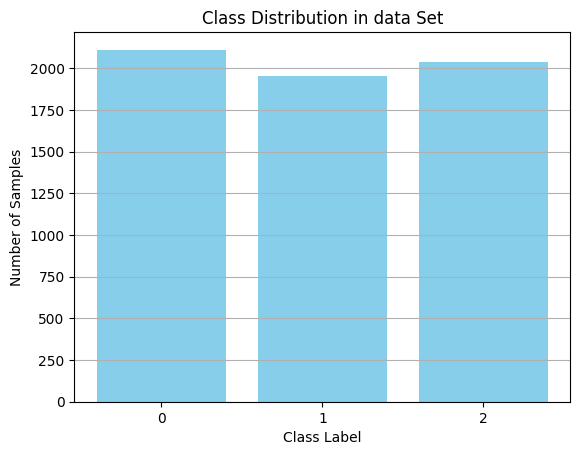

In [ ]:
label_counts = Counter(y)
plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.title("Class Distribution in data Set")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.xticks([0, 1,2])
plt.grid(axis='y')
plt.show()

In [ ]:
from tensorflow.keras.applications import Xception

base_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_shape=(128, 128, 3)
)

base_model.trainable = False
pre_traind = models.Sequential([
    layers.Resizing(128, 128),
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

early_stop = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(patience=3, factor=0.5, verbose=1)

pre_traind.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

pre_traind.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    callbacks=[early_stop, reduce_lr],

)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 446s 3s/step - accuracy: 0.5243 - loss: 1.9768 - val_accuracy: 0.6530 - val_loss: 0.7555 - learning_rate: 0.0010
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 417s 3s/step - accuracy: 0.6886 - loss: 0.7009 - val_accuracy: 0.7201 - val_loss: 0.6731 - learning_rate: 0.0010
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 408s 3s/step - accuracy: 0.7709 - loss: 0.5644 - val_accuracy: 0.7242 - val_loss: 0.6705 - learning_rate: 0.0010
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 403s 3s/step - accuracy: 0.8040 - loss: 0.4734 - val_accuracy: 0.7365 - val_loss: 0.6563 - learning_rate: 0.0010
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 441s 3s/step - accuracy: 0.8298 - loss: 0.3996 - val_accuracy: 0.7447 - val_loss: 0.6822 - learning_rate: 0.0010
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 447s 3s/step - accuracy: 0.8725 - loss: 0.3243 - val_accuracy: 0.7660 - val_loss: 0.7445 - learning_rate: 0.0010
Epoch 7/20
153/153 ━━━━━━━━━━━━

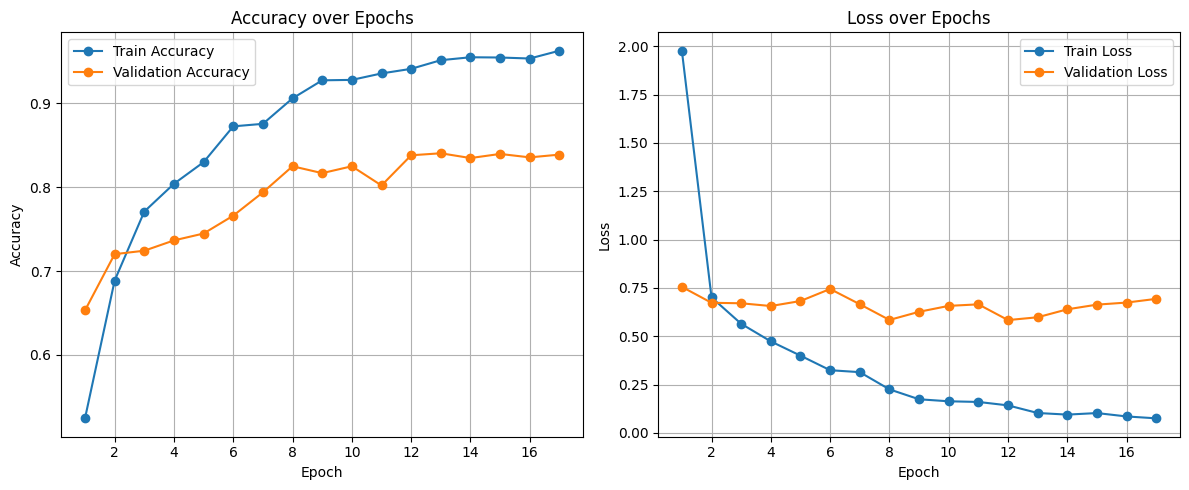

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(1, 18))
train_accuracy = [
    0.5243, 0.6886, 0.7709, 0.8040, 0.8298, 0.8725, 0.8755, 0.9059,
    0.9274, 0.9279, 0.9356, 0.9411, 0.9514, 0.9549, 0.9546, 0.9534, 0.9627
]
train_loss = [
    1.9768, 0.7009, 0.5644, 0.4734, 0.3996, 0.3243, 0.3143, 0.2253,
    0.1740, 0.1636, 0.1602, 0.1424, 0.1030, 0.0947, 0.1027, 0.0852, 0.0754
]
val_accuracy = [
    0.6530, 0.7201, 0.7242, 0.7365, 0.7447, 0.7660, 0.7938, 0.8249,
    0.8167, 0.8249, 0.8020, 0.8380, 0.8404, 0.8347, 0.8396, 0.8355, 0.8388
]
val_loss = [
    0.7555, 0.6731, 0.6705, 0.6563, 0.6822, 0.7445, 0.6656, 0.5843,
    0.6265, 0.6571, 0.6650, 0.5836, 0.5982, 0.6393, 0.6635, 0.6742, 0.6934
]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, label='Train Accuracy', marker='o')
plt.plot(epochs, val_accuracy, label='Validation Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
pre_traind.save('model.h5')

NameError: name 'pre_traind' is not defined

In [ ]:
import os
print(os.getcwd())  # current working directory
print(os.listdir())  # list files



/content
['.config', 'model.h5', 'app.py', 'sample_data']


In [1]:
from tensorflow.keras.models import load_model
model = load_model('model.h5')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing (Resizing)             │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 4, 4, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,316,909 (111.84 MB)

 Trainable params: 8,455,427 (32.25 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

 Optimizer params: 2 (12.00 B)

In [2]:
!pip install -q streamlit pyngrok opencv-python-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 126.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00


In [3]:
%%writefile app.py
import streamlit as st
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from PIL import Image


st.set_page_config(
    page_title="Burn Severity Classifier",
    layout="centered",
    initial_sidebar_state="auto"
)


@st.cache_resource
def load_burn_model():
    return load_model("model.h5")

model = load_burn_model()

CLASS_NAMES = {
    0: "🟡 First Degree Burn",
    1: "🟠 Second Degree Burn",
    2: "🔴 Third Degree Burn"
}

st.markdown("""
    <style>
    .main {
        background-color: #f7f9fc;
    }
    .stButton>button {
        background-color: #ff4b4b;
        color: white;
        font-weight: bold;
        border-radius: 8px;
        padding: 10px 24px;
    }
    </style>
""", unsafe_allow_html=True)

st.title("🔥 Burn Severity Classifier")
st.caption("Upload a skin burn image to classify it as First, Second, or Third degree.")


uploaded_file = st.file_uploader("📷 Upload an image (JPG/PNG)", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    image_data = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
    image_bgr = cv2.imdecode(image_data, cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    resized_img = cv2.resize(image_rgb, (128, 128))
    normalized_img = resized_img / 255.0
    input_img = np.expand_dims(normalized_img, axis=0)

    st.image(resized_img, caption="🖼️ Uploaded Image", use_column_width=True)

    # -------------------------
    # Predict
    # -------------------------
    st.markdown("---")
    st.subheader("📊 Prediction")

    with st.spinner("Analyzing burn severity..."):
        predictions = model.predict(input_img)[0]
        class_idx = int(np.argmax(predictions))
        confidence = float(predictions[class_idx])

    label = CLASS_NAMES[class_idx]
    st.success(f"**{label}** detected with **{confidence*100:.2f}%** confidence.")

    # Display bar chart
    st.markdown("### 🔬 Prediction Confidence")
    st.bar_chart({
        "Confidence": {
            "First Degree": predictions[0],
            "Second Degree": predictions[1],
            "Third Degree": predictions[2]
        }
    })

else:
    st.info("👈 Please upload a JPG or PNG image to continue.")


Writing app.py


In [4]:
import os
from pyngrok import ngrok
authtoken = "30biN5Av5FU17lVyRU2rU4duxxD_5wXYMj1HmPPNFHDEENu5J"
!ngrok config add-authtoken {authtoken}


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [5]:
from pyngrok import ngrok
!ngrok config add-authtoken 30biN5Av5FU17lVyRU2rU4duxxD_5wXYMj1HmPPNFHDEENu5J


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [6]:
from pyngrok import ngrok
tunnels = ngrok.get_tunnels()

if tunnels:
    public_url = tunnels[0].public_url
    print(f"✅ Streamlit app is already live at: {public_url}")
else:
    !pkill streamlit
    get_ipython().system_raw('streamlit run app.py &')
    public_url = ngrok.connect("http://localhost:8501", "http")
    print(f"✅ Streamlit app is live at: {public_url}")

✅ Streamlit app is live at: NgrokTunnel: "https://e0ebfe13b98c.ngrok-free.app" -> "http://localhost:8501"
